In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

In [2]:
source_data = pd.read_csv('data set/mails.csv')
print(source_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [3]:
has_nan = source_data.isna().any().any()
print(has_nan)

False


In [4]:
data = source_data

In [5]:
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
data.shape

(5572, 2)

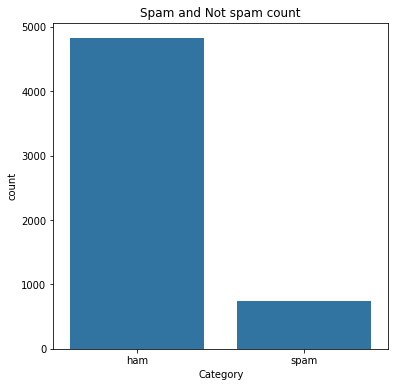

In [7]:
plt.figure(figsize=(6,6))
sns.countplot(x='Category', data=data)
plt.title('Spam and Not spam count')
plt.show()

In [8]:
data['Category'] = data['Category'].map({'spam': 0, 'ham': 1})

In [9]:
data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
X = data['Message']
Y = data['Category']

print(X.head())
print(Y.head())

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object
0    1
1    1
2    0
3    1
4    1
Name: Category, dtype: int64


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
vectorizer = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train_v, Y_train)

LogisticRegression()

In [25]:
Y_pred = model.predict(X_test_v)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"test accuracy: {accuracy}")

test accuracy: 0.967713004484305


In [26]:
user_input = ["Congratulations! You've won a $1000 gift card. Click here to claim your prize now!"]

user_input_v = vectorizer.transform(user_input)

prediction = model.predict(user_input_v)

if prediction[0] == 0:
    print("Spam mail detected")
else:
    print("Not a spam mail")

Spam mail detected


In [28]:
with open('spam_detection_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)